In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=10
paper='2008.08998'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's follow the approach from the example to build our response step by step.

### QUESTION 1: Dimension and Basis Order

First, I need to identify the flavors in the Hamiltonian:

From the equation, I can see:
- $s$ and $s'$ refer to spin indices
- $\bm{q}$ refers to reciprocal lattice vectors, specifically the three high-symmetry points: Γ, K, and K'
- $\bm{p}$ refers to crystal momentum within the folded Brillouin zone

So the flavors we have are:
1. Spin (s)
2. Reciprocal lattice vector (q)

For spin, we typically have two values: up (↑) and down (↓)
For reciprocal lattice vector (q), we have three high-symmetry points: Γ, K, and K'

So our tuple D would be:
D = (2, 3) # (|spin|, |reciprocal_lattice_vector|)

The basis order would be:
0: spin. Order: spin_up (↑), spin_down (↓)
1: reciprocal_lattice_vector. Order: Γ, K, K'

### QUESTION 2: Identifying Interacting Terms

Now I need to identify which terms depend on `exp_val` and w

In [7]:
print(generated_code['thinking'])

Let's follow the approach from the example to build our response step by step.

### QUESTION 1: Dimension and Basis Order

First, I need to identify the flavors in the Hamiltonian:

From the equation, I can see:
- $s$ and $s'$ refer to spin indices
- $\bm{q}$ refers to reciprocal lattice vectors, specifically the three high-symmetry points: Γ, K, and K'
- $\bm{p}$ refers to crystal momentum within the folded Brillouin zone

So the flavors we have are:
1. Spin (s)
2. Reciprocal lattice vector (q)

For spin, we typically have two values: up (↑) and down (↓)
For reciprocal lattice vector (q), we have three high-symmetry points: Γ, K, and K'

So our tuple D would be:
D = (2, 3) # (|spin|, |reciprocal_lattice_vector|)

The basis order would be:
0: spin. Order: spin_up (↑), spin_down (↓)
1: reciprocal_lattice_vector. Order: Γ, K, K'

### QUESTION 2: Identifying Interacting Terms

Now I need to identify which terms depend on `exp_val` and which are interacting vs. non-interacting.

In the Ham

In [8]:
print(generated_code['text'])

# ANSWER:

## QUESTION 1: Dimension and Basis Order

Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: spin_up (↑), spin_down (↓)
1: reciprocal_lattice_vector. Order: Γ, K, K'

## QUESTION 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS:
- `\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha) \rangle`: Hartree term expectation value between q_alpha and q_delta for spin s
- `\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\gamma,s'}(\bm{p}_\alpha) \rangle`: Fock term expectation value between q_alpha and q_gamma for spins s and s'

TERMS:
- $-\sum_{s}\sum_{\bm{p},\bm{q}}\sum_{R_\bm{n}} t_{s}(\bm{n}) e^{-i (\bm{p}+\bm{q}) \cdot R_\bm{n}} c_{\bm{p}+\bm{q},s}^\dagger c_{\bm{p},s}$ -> H[s, q, s, q, k], NI (non-interacting term)
- $\frac{1}{\mathcal{N}}\sum_{s,s'} \sum_{\bm{p},\bm{q}} U(\bm{q}_\alpha-\bm{q}_\delta)\delta_{\bm{q}_\alpha+\bm{q}_\beta,\bm{q}_\gamma+\bm{q}_\delta} \langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) 

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with spin and
    high-symmetry points in the reciprocal space.
    
    Args:
        N_shell (int): Number of shells in k-space.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor, default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2, 3)  # (|spin|, |reciprocal_lattice_vector|)
        self.basis_order = {
            '0': 'spin',
            '1': 'reciprocal_lattice_vector'
        }
        # Order for each flavor:
        # 0: spin: spin_up (↑), spin_down (↓)
        # 1: reciprocal_lattice_vector: Γ, K, K'
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, defa

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2008_08998_10.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

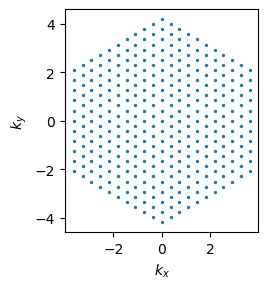

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

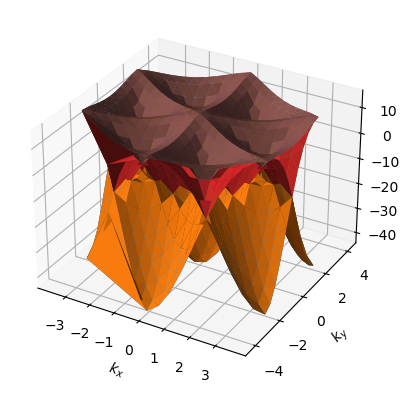

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

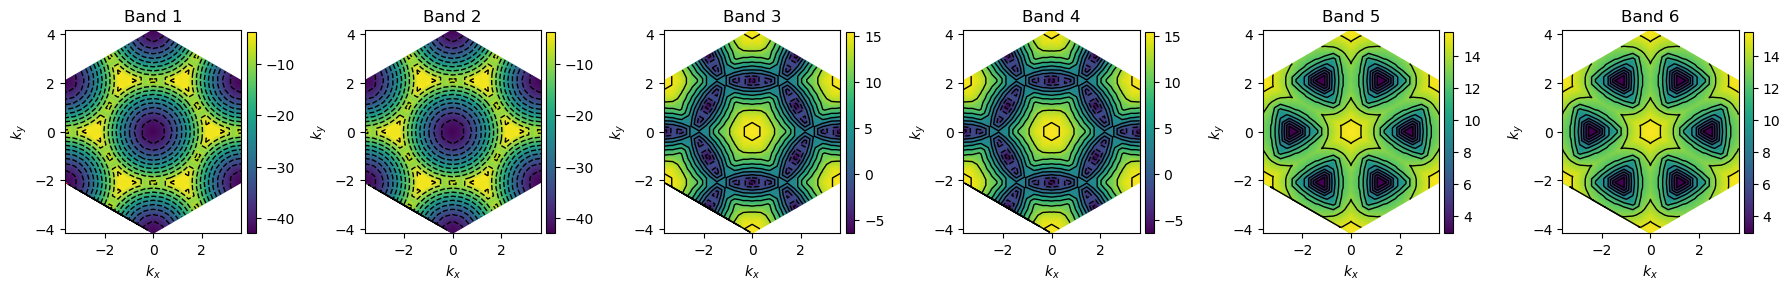

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e5},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

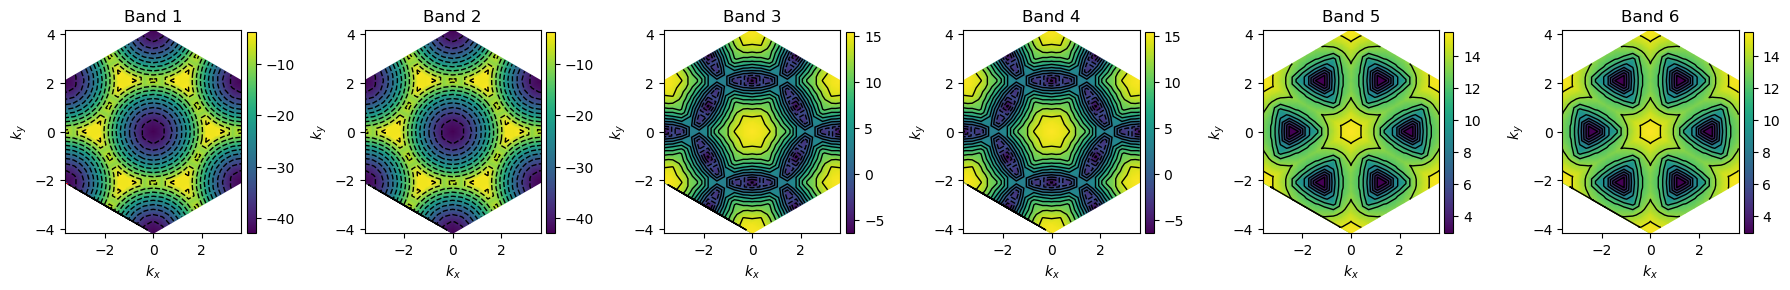

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e-2},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
for q in range(3):
    h_nonint[0,q,0,q,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 0


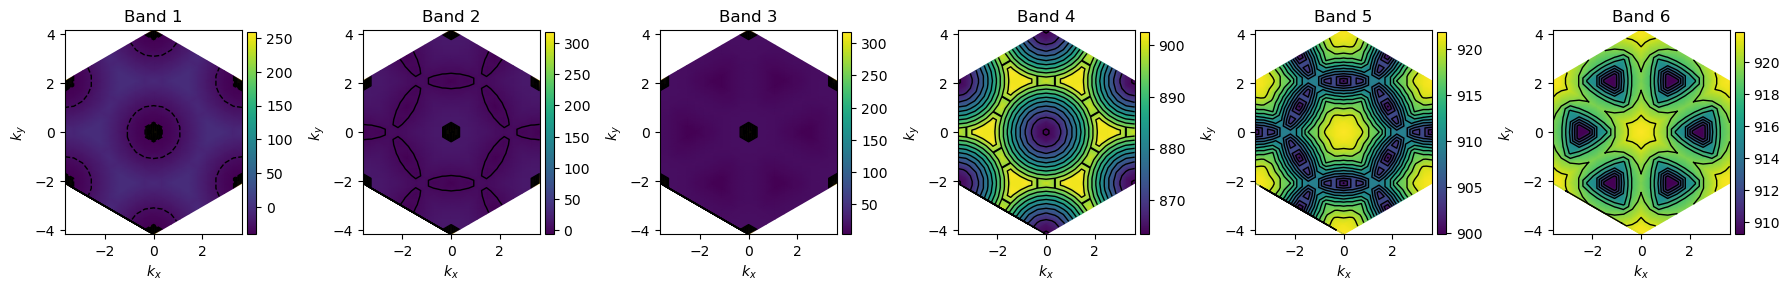

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is -314.70
U/T is 33.29
mean_U is 76.06


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and check it against the problem description and rubric.

The image shows a hexagonal pattern of dots in k-space (momentum space), which represents a mesh in the first Brillouin zone. The axes are labeled as k_x and k_y, and the range of both axes is approximately from -4 to 4.

According to the rubric, I need to:
1. Check if this is a momentum space mesh in the first Brillouin zone
2. Check the point group symmetry

First, let's confirm whether this appears to be a proper mesh in the first Brillouin zone for the system described:

The problem describes a triangular lattice. The first Brillouin zone of a triangular lattice is indeed hexagonal in shape, which matches what we see in the image. So in terms of the shape, the mesh appears correct.

The problem also mentions a "folded Brillouin zone" corresponding to the √3 × √3 superlattice in real space. This folding would indeed result in a smaller Brillouin zon

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image according to the given rubric. The image shows false color plots with contour lines for 6 bands in what appears to be the first Brillouin zone.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the plots, I can see that each plot has a hexagonal boundary. This is indeed the expected shape for the first Brillouin zone of a triangular lattice, so this criterion is met.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
In Bands 1 and 2, the highest energy regions (yellow) appear at the corners of the hexagon.
In Bands 3 and 4, the highest energy regions are at the center and corners of the hexagon.
In Bands 5 and 6, the highest energy regions form a pattern with hexagonal symmetry.

2.2 Trace the pattern of energy variation across the zo

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

I need to analyze the band structure plots in the provided image based on the given Hamiltonian and rubric. Let me go through each point in the rubric systematically:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that each band plot shows a hexagonal boundary, which is the correct shape for the first Brillouin zone of a triangular lattice. The hexagonal shape with six corners is consistent with the symmetry of a triangular lattice in reciprocal space.

2. Examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
In Bands 1 and 2, the highest energy regions (yellow) appear at the corners and in a hexagonal pattern around the center.
In Bands 3 and 4, the highest energy regions are at the center and corners of the hexagon.
In Bands 5 and 6, the highest en

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='U/epsilon_r=1000/1e-2=100000',nu=1/2)
    )


#################### THINKING ####################

Let me analyze the provided false color plots of the band structure systematically according to the rubric.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the images, I can see that each band is plotted within a hexagonal boundary. This hexagonal shape is indeed the correct Brillouin zone for a triangular lattice, so this criterion is satisfied. The hexagonal shape is clearly visible in all six band plots.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
- In Band 1: The highest energy appears to be at the corners of the hexagon
- In Band 2: Similar pattern with high energy at the corners
- In Band 3: Similar to Bands 1 and 2
- In Band 4: High energy regions form a pattern with hexagonal symmetry
- In Band 5: Complex pattern of high energy regions with hex

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '10' saved to final_answer.yaml
